<a href="https://colab.research.google.com/github/Tayyab7404/Tayyab7404/blob/main/IPL%20Score%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Score Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import keras

### Loading the dataset:

In [2]:
ipl = pd.read_csv('ipl_data.csv')

display(ipl)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


### Data Pre-processing:

In [3]:
# Dropping certain features

df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

display(df)

X = df.drop(['total'], axis =1)
y = df['total']

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


### Label Encoding:

In [4]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

### Train Test Split:

In [5]:
# Train test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling:

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Define the Neural Network:

In [7]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
    keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression

### Model Training:

In [8]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 6s 6ms/step - loss: 31.8183 - val_loss: 22.2693
Epoch 2/50
832/832 [==============================] - 5s 6ms/step - loss: 22.4114 - val_loss: 22.2319
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2877 - val_loss: 22.2516
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2727 - val_loss: 21.9029
Epoch 5/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2083 - val_loss: 21.8809
Epoch 6/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2149 - val_loss: 21.8885
Epoch 7/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1535 - val_loss: 21.8534
Epoch 8/50
832/832 [==============================] - 6s 8ms/step - loss: 22.1124 - val_loss: 21.8761
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1327 - val_loss: 22.6878
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1557

<Axes: >

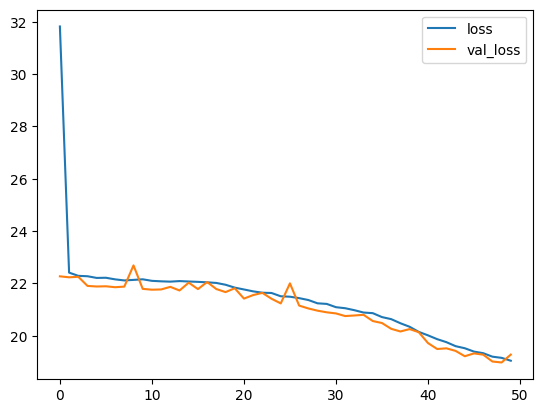

In [9]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

### Model Evaluation:

In [10]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 2s 2ms/step


19.770487932917373

### Let’s create an Interactive Widget:

In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output() # Clear the previous output

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

### Score Predictor:

In [12]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()